In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np    

In [2]:
# In[3]:


tf.enable_eager_execution()
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [9]:
# In[4]:


#학습 데이터의 경로
TRAIN_DIR = './train/'
#테스트 데이터의 경로
TEST_DIR = './test/'
LR =0.001
batch_size = 32

In [4]:
# In[5]:


#이미지의 가로 세로
IM_WIDTH = 224
IM_HEIGHT = 224

In [7]:
# In[6]:



from keras_preprocessing.image import ImageDataGenerator

In [10]:
# 학습에 사용될 이미지 데이터 생성기
# epoch를 실행할때마다 변형된 이미지를 리턴해서 
#이미지가 많은것 같은 효과를 줌
train_datagen = ImageDataGenerator(
      rotation_range=180, # 회전 쵀대 80도
      width_shift_range=0.2, # 좌우 이동
      height_shift_range=0.2, # 상하 이동
      horizontal_flip=True, # 좌우 반전
      vertical_flip=True, # 상하 반전
      )
 
# 검증에 사용될 이미지 데이터 생성기
#테스트에서는 이미지를 변형 할 필요가 없으므로
#ImageDataGenerator에 값을 주지 않음
#이미지가 변형되지 않고 같은 이미지 리턴
test_datagen = ImageDataGenerator()
 

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IM_WIDTH, IM_HEIGHT),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(IM_WIDTH, IM_HEIGHT),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [11]:
# In[7]:


#ImgeDataGenerator는 Target를 지정 할 필요 없이 
#train폴더 안의 서브폴더가 class임
#클래스의 종류는 3개
class_num=len(train_generator.class_indices)
class_num

3

In [12]:
# In[8]:


#클래스 폴더의 이름을 리턴
custom_labels = list(train_generator.class_indices.keys())
custom_labels

['cured', 'decayed', 'healthy']

In [13]:
# In[9]:


from tensorflow import keras

# 2. 모델 구성하기
#CNN 모델을 생성
def create_model():
    #CNN각 단계를 순서대로 저장할 객체 생성
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, activation=tf.nn.relu, padding='SAME', 
                                  input_shape=(IM_WIDTH, IM_HEIGHT, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(class_num,activation='softmax'))
    return model

In [14]:
# In[ ]:


model=create_model()


# In[ ]:


model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxP

In [15]:
# In[ ]:


# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-4), metrics=['accuracy'])


# In[ ]:

In [16]:
# 4. 모델 학습시키기
#모델 학습시 정확도와 loss를 history애 추가
history=model.fit_generator(
      train_generator,
      steps_per_epoch=(train_generator.samples/train_generator.batch_size) ,
      epochs=10,
      validation_data=test_generator,
      validation_steps=test_generator.samples/test_generator.batch_size,
      verbose=1)

Epoch 1/10
Instructions for updating:
Use tf.cast instead.
5/5 [==============================] - 58s 12s/step - loss: 8.9419 - acc: 0.3400 - val_loss: 10.7934 - val_acc: 0.3333
Epoch 2/10
5/5 [==============================] - 54s 11s/step - loss: 10.6457 - acc: 0.3333 - val_loss: 10.7934 - val_acc: 0.3333
Epoch 3/10
5/5 [==============================] - 55s 11s/step - loss: 10.7367 - acc: 0.3067 - val_loss: 10.5016 - val_acc: 0.3333
Epoch 4/10
5/5 [==============================] - 55s 11s/step - loss: 9.3103 - acc: 0.3200 - val_loss: 8.9924 - val_acc: 0.3333
Epoch 5/10
5/5 [==============================] - 56s 11s/step - loss: 7.5762 - acc: 0.3600 - val_loss: 7.2232 - val_acc: 0.3333
Epoch 6/10
5/5 [==============================] - 56s 11s/step - loss: 6.1234 - acc: 0.3733 - val_loss: 3.0357 - val_acc: 0.3500
Epoch 7/10
5/5 [==============================] - 55s 11s/step - loss: 2.0901 - acc: 0.3467 - val_loss: 1.3679 - val_acc: 0.3333
Epoch 8/10
5/5 [============================

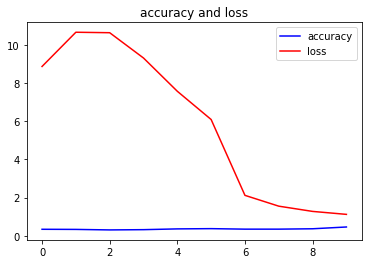

In [17]:
# In[ ]:


import matplotlib.pyplot as plt
#history에 저장된 정확도 리스트를 acc에 대입
acc = history.history['acc']
#history에 저장된 loss리스트를 loss에 대입
loss = history.history['loss']
#acc의 개수 만큼 x좌표 설정 
x = range(len(acc))
 
plt.plot(x, acc, 'b', label='accuracy')
plt.plot(x, loss, 'r', label='loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

In [21]:
# In[ ]:


from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array

from IPython.display import display
#예측할 이미지 파일의 경로를 files에 대입
files = [
    './test/healthy/1.jpg',
    './test/healthy/2.jpg',
    './test/decayed/101.jpg',
    './test/decayed/102.jpg',
    './test/cured/301.jpg',
    './test/cured/302.jpg',
     ]

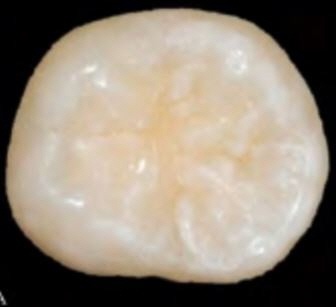

decayed (39.08%)


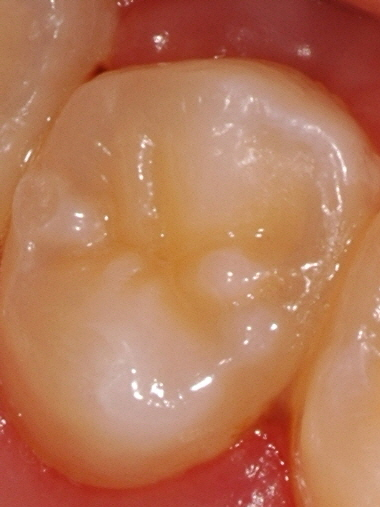

healthy (46.27%)


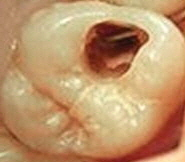

decayed (52.43%)


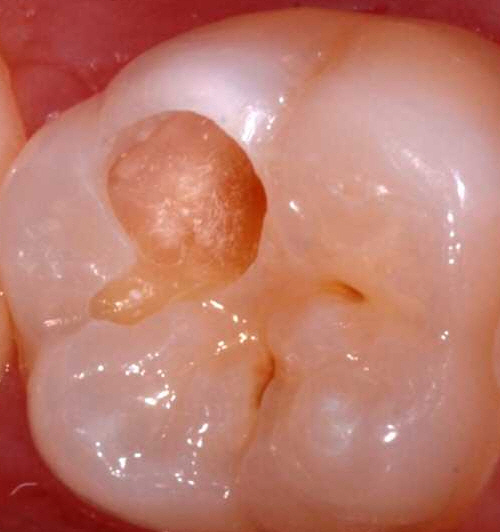

healthy (41.04%)


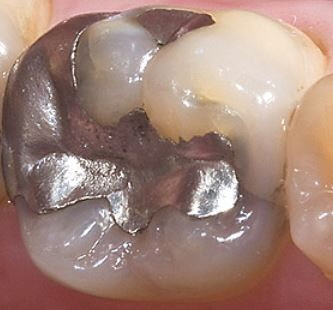

decayed (57.56%)


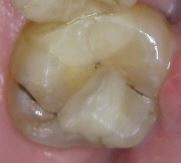

decayed (43.65%)


In [22]:
#반복문을 실행
for file in files:
    #file경로의 이미지 파일을 읽음
    image = load_img(file)
    #이미지 파일 화면에 출력
    display(image)
    #이미지 파일의 크기를 224X224로 변형
    image_resize = load_img(file, target_size=(224, 224))
    #이미지 파일의 내용을 numpy배열로 변환해서 리턴(3차원 배열)
    image_arr_dm3 = img_to_array(image_resize)
    #배열 image를 4차원 배열로 변환
    image_arr_dm4 = image_arr_dm3.reshape((1, 224, 224, 3))
    yhat = model.predict(image_arr_dm4)
    

    # 최대 출력 인덱스를 구한다.
    idx=np.argmax(yhat[0])

    # 커스텀 레이블을 출력한다.
    print('%s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))


# In[ ]: